<a href="https://colab.research.google.com/github/elhamod/BA820/blob/main/Hands-on/02-clustering/Clustering_Synthetic_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To appreicate the bells and whistles of hierarchical clustering, it is best to first play with some synthetic data. Let's create some 2D data.

## Let's create some data

In [1]:
import pandas as pd
import random
import numpy as np

Cluster 1

In [2]:
# Some parameters to control the cluster
points =50
mu_x = 0
sigma_x = 0.1
mu_y = 0
sigma_y = 0.1
x = np.random.normal(mu_x, sigma_x, points)
y = np.random.normal(mu_y, sigma_y, points)

df = pd.DataFrame({'x': x, 'y': y})

Let's create another cluster

<Axes: xlabel='x', ylabel='y'>

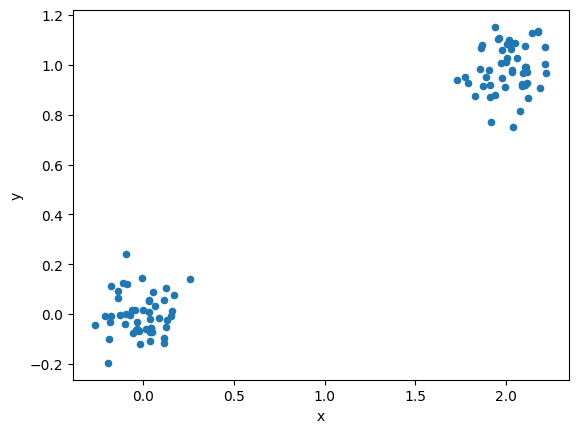

In [3]:
points = 50
mu_x = 2
sigma_x = 0.1
mu_y = 1
sigma_y = 0.1
x = np.random.normal(mu_x, sigma_x, points)
y = np.random.normal(mu_y, sigma_y, points)

temp_df = pd.DataFrame({'x': x, 'y': y})
df = pd.concat([df, temp_df], axis=0)

df.plot.scatter(x='x', y='y')

## Cluster Analysis - Hierarchical

In [4]:
from scipy.cluster.hierarchy import linkage, fcluster
import seaborn as sns

Always a good idea to put the parameters of interest in their own cell.

In [5]:
num_clusters = 2
method = 'single'

First calculate the proximity matrix

In [6]:
Z = linkage(df, method) # 'ward' 'complete' 'single' 'average' centroid,

Z

array([[3.70000000e+01, 4.10000000e+01, 1.47678799e-03, 2.00000000e+00],
       [6.50000000e+01, 6.80000000e+01, 5.45358540e-03, 2.00000000e+00],
       [3.60000000e+01, 4.30000000e+01, 5.65124314e-03, 2.00000000e+00],
       [9.00000000e+00, 3.10000000e+01, 5.95065545e-03, 2.00000000e+00],
       [7.10000000e+01, 8.20000000e+01, 6.16786689e-03, 2.00000000e+00],
       [5.00000000e+00, 1.02000000e+02, 6.98546482e-03, 3.00000000e+00],
       [2.90000000e+01, 1.05000000e+02, 8.27880974e-03, 4.00000000e+00],
       [6.10000000e+01, 8.00000000e+01, 8.46609155e-03, 2.00000000e+00],
       [6.20000000e+01, 9.10000000e+01, 9.71927169e-03, 2.00000000e+00],
       [6.90000000e+01, 7.70000000e+01, 1.01726029e-02, 2.00000000e+00],
       [7.30000000e+01, 8.60000000e+01, 1.15020328e-02, 2.00000000e+00],
       [1.50000000e+01, 4.20000000e+01, 1.24834629e-02, 2.00000000e+00],
       [5.20000000e+01, 5.90000000e+01, 1.37523864e-02, 2.00000000e+00],
       [5.00000000e+01, 1.08000000e+02, 1.44347427e

Now, do the clustering based on the proximity matrix.

In [7]:
df['cluster_labels'] = fcluster(Z, num_clusters, criterion='maxclust')

Plot the clustering

<Axes: xlabel='x', ylabel='y'>

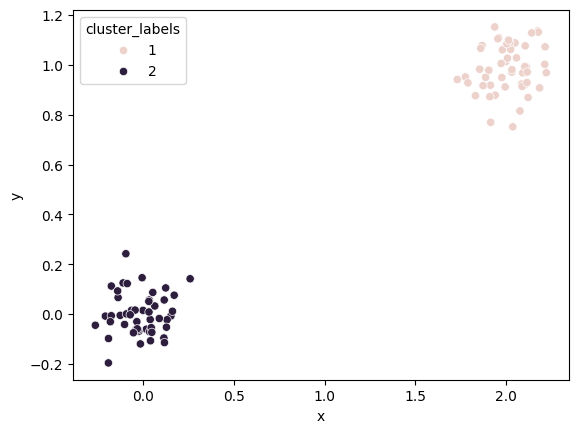

In [8]:
sns.scatterplot(x='x', y='y', hue='cluster_labels', data = df)

Plot the dendrogram

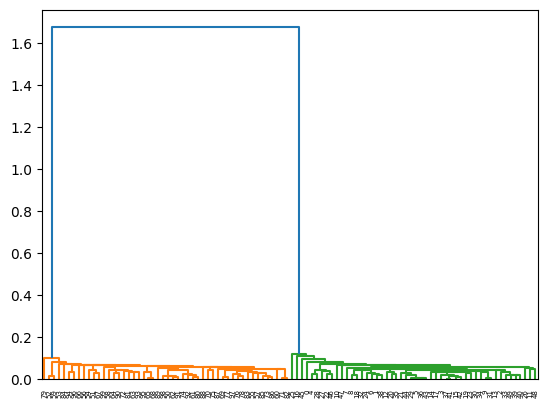

In [9]:
from scipy.cluster.hierarchy import dendrogram

_ = dendrogram(Z)

## Cluster Analysis - Kmeans

Let's compare the hierarchial clustering result with k-means

In [10]:
from sklearn.cluster import KMeans

In [11]:
df_kmeans = df.drop('cluster_labels', axis=1)

Define the number of clusters

In [12]:
num_clusters = 2

Find the cluster centroids

In [13]:
# Generate cluster centers and labels
kmeans_result = KMeans(num_clusters,init='random').fit(df_kmeans[['x', 'y']])  #, init = [[2, 1 ],[0, 0]]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
kmeans_result.cluster_centers_

array([[-1.35756698e-02, -9.98258466e-04],
       [ 2.01021161e+00,  9.85696647e-01]])

Assign each point to its cluster

In [15]:
df_kmeans['cluster_labels'] = kmeans_result.labels_

Plot the clustering

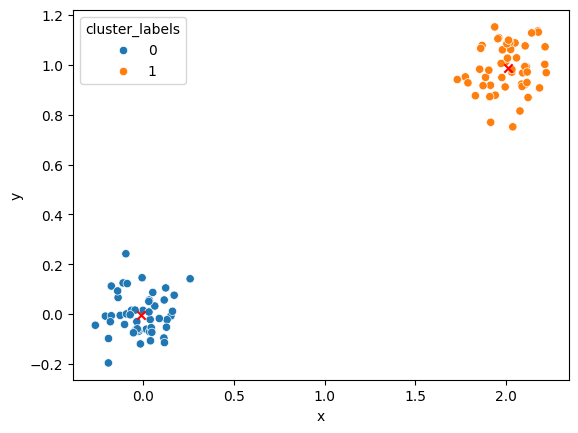

In [16]:
import matplotlib.pyplot as plt

# Plot clusters
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df_kmeans)

#plot centroids
plt.scatter(kmeans_result.cluster_centers_[:, 0], kmeans_result.cluster_centers_[:, 1], color='red', marker='x')

# Show the plot with the new points
plt.show()

## Let's try 3D data

Let's create some 3D data and use it for k-means using ` np.random.multivariate_normal`

In [17]:
import numpy as np

# First distribution
# Mean and covariance
mean = [0, 0, 0]
covariance = np.diag([1,2,1]) #np.eye(3)

# Generating random samples
num_samples = 100
samples = np.random.multivariate_normal(mean, covariance, num_samples)

In [18]:
# Second distribution
# Mean and covariance
mean = [3, 3, 3]
covariance = np.diag([2,1,1])

# Generating random samples
num_samples = 2000
samples2 = np.random.multivariate_normal(mean, covariance, num_samples)

In [19]:
# Third distribution
# Mean and covariance
mean = [5, 5, 5]
covariance = np.diag([0.5,1,0.5])

# Generating random samples
num_samples = 150
samples3 = np.random.multivariate_normal(mean, covariance, num_samples)

Let's put all samples together in a dataframe

In [20]:
df_3d = pd.DataFrame(samples, columns=['x', 'y', 'z'])
df_3d = pd.concat([df_3d, pd.DataFrame(samples2, columns=['x', 'y', 'z'])], axis=0)
df_3d = pd.concat([df_3d, pd.DataFrame(samples3, columns=['x', 'y', 'z'])], axis=0)

Let's plot it: https://plotly.com/python/3d-scatter-plots/

In [21]:
import plotly.express as px

fig = px.scatter_3d(df_3d, x='x', y='y', z='z')
fig.update_traces(marker_size = 3) # makes the points smaller (better visualization)
fig.show()

Let's try some hierarchical clustering

In [22]:
Z = linkage(df_3d, 'ward') #Try different ones.
df_3d['cluster_labels'] = fcluster(Z, 3, criterion='maxclust')

In [23]:
fig = px.scatter_3d(df_3d, x='x', y='y', z='z', color='cluster_labels')
fig.update_traces(marker_size = 3) # makes the points smaller (better visualization)
fig.show()

Let's try k-means

In [24]:
kmeans_result = KMeans(3,init='random').fit(df_3d[['x', 'y', 'z']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [25]:
df_3d['cluster_labels'] = kmeans_result.labels_

In [26]:
fig = px.scatter_3d(df_3d, x='x', y='y', z='z', color='cluster_labels')
fig.update_traces(marker_size = 3) # makes the points smaller (better visualization)
fig.show()

Let's add the centroids

In [27]:
df_centroids = pd.DataFrame(kmeans_result.cluster_centers_, columns=['x', 'y', 'z'])

In [28]:
import plotly.graph_objects as go
centroid_plot = go.Scatter3d(
    x=df_centroids['x'],
    y=df_centroids['y'],
    z=df_centroids['z'],
    name='centroids',
    mode='markers',
    marker_symbol='x',
    marker_color ='green',
    marker_size = 4
)

fig.add_trace(centroid_plot)

##Things we could try:


1.   What if we make the data non-Gaussian?
2.   Trying different densities, sizes, number of clusters, initialization, etc.
